# Physics 21 Spring 2021
# Assignment 2

In [241]:
import numpy as np, scipy.fft as fft
from matplotlib import pyplot as plt

## Part 1e

### Cosine

In [263]:
C, A, f, phi = 5, 2, 1, 1

In [278]:
samplingRate = 10
t_values = np.arange(-10, 10, 1/samplingRate)
cosine_data = C + A * np.cos(2 * np.pi * f * t_values + phi) 

<IPython.core.display.Javascript object>


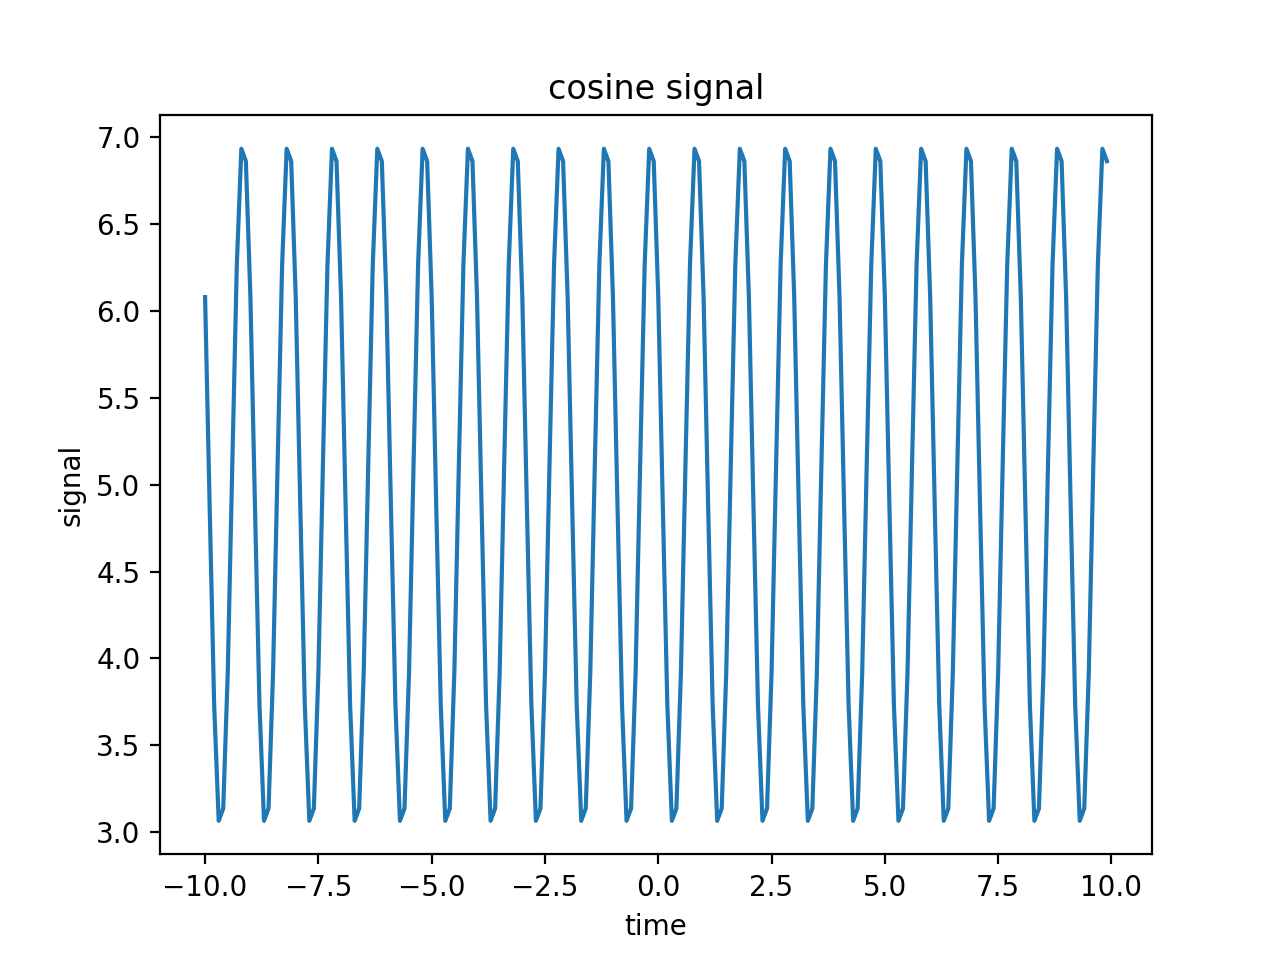

Text(0.5, 1.0, 'cosine signal')

In [272]:
%matplotlib notebook
plt.plot(t_values, cosine_data)
plt.xlabel("time")
plt.ylabel("signal")
plt.title("cosine signal")

<IPython.core.display.Javascript object>


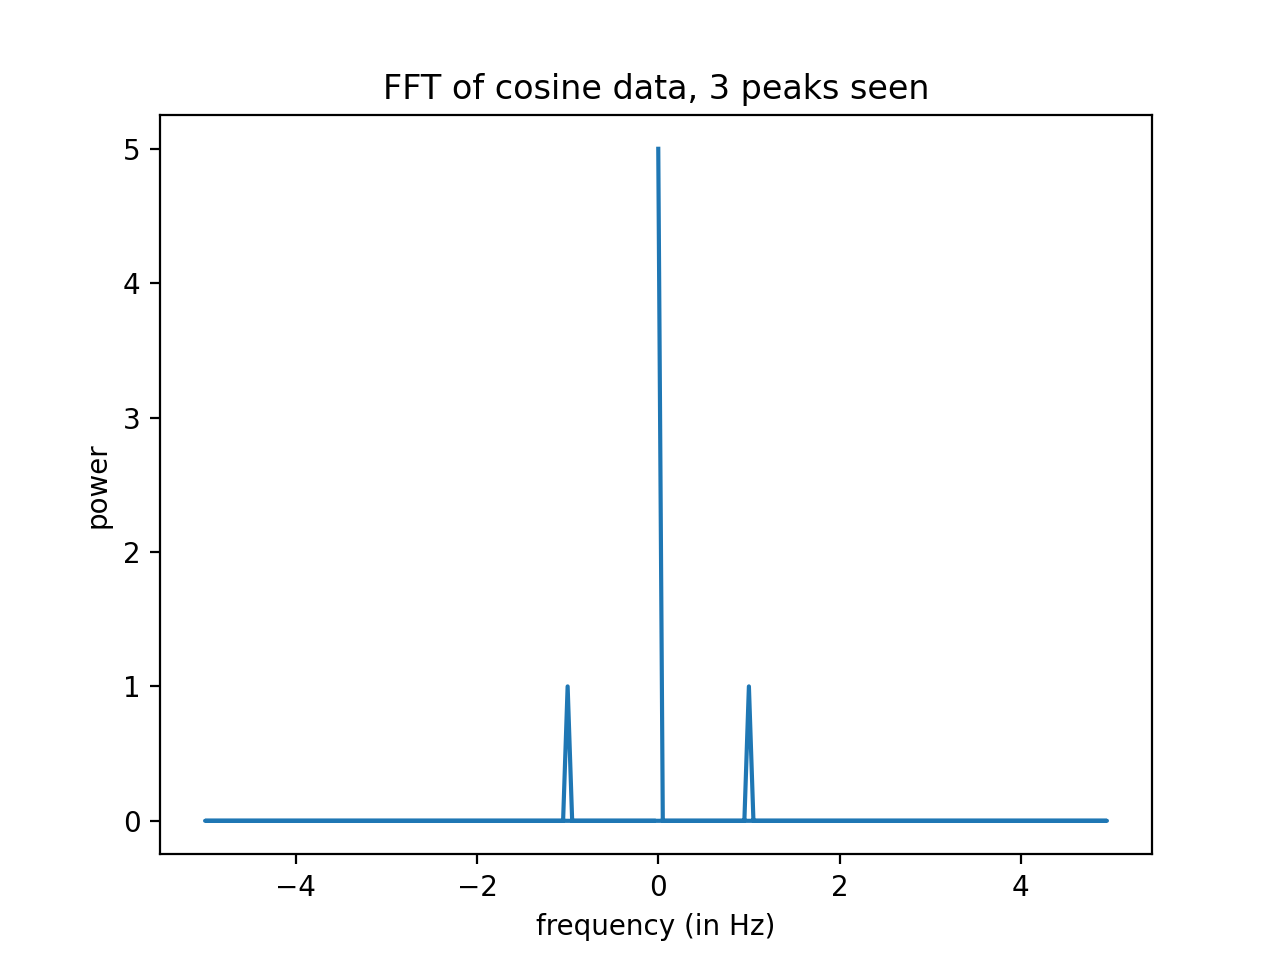

Text(0.5, 1.0, 'FFT of cosine data, 3 peaks seen')

In [273]:
%matplotlib notebook
# makes plots interactive

fft_data = fft.fft(cosine_data) / len(cosine_data)
freqs = fft.fftfreq(len(cosine_data), 1/samplingRate)

plt.plot(freqs, abs(fft_data))
plt.xlabel("frequency (in Hz)")
plt.ylabel("power")
plt.title("FFT of cosine data, 3 peaks seen")

### Gaussian

In [291]:
A, B, L = 2, 50, 1 

In [292]:
samplingRate = 1000
t_values = np.arange(-3, 3, 1/samplingRate)
gaussian_data = A * np.exp(-B * (t_values - L / 2) ** 2)

<IPython.core.display.Javascript object>


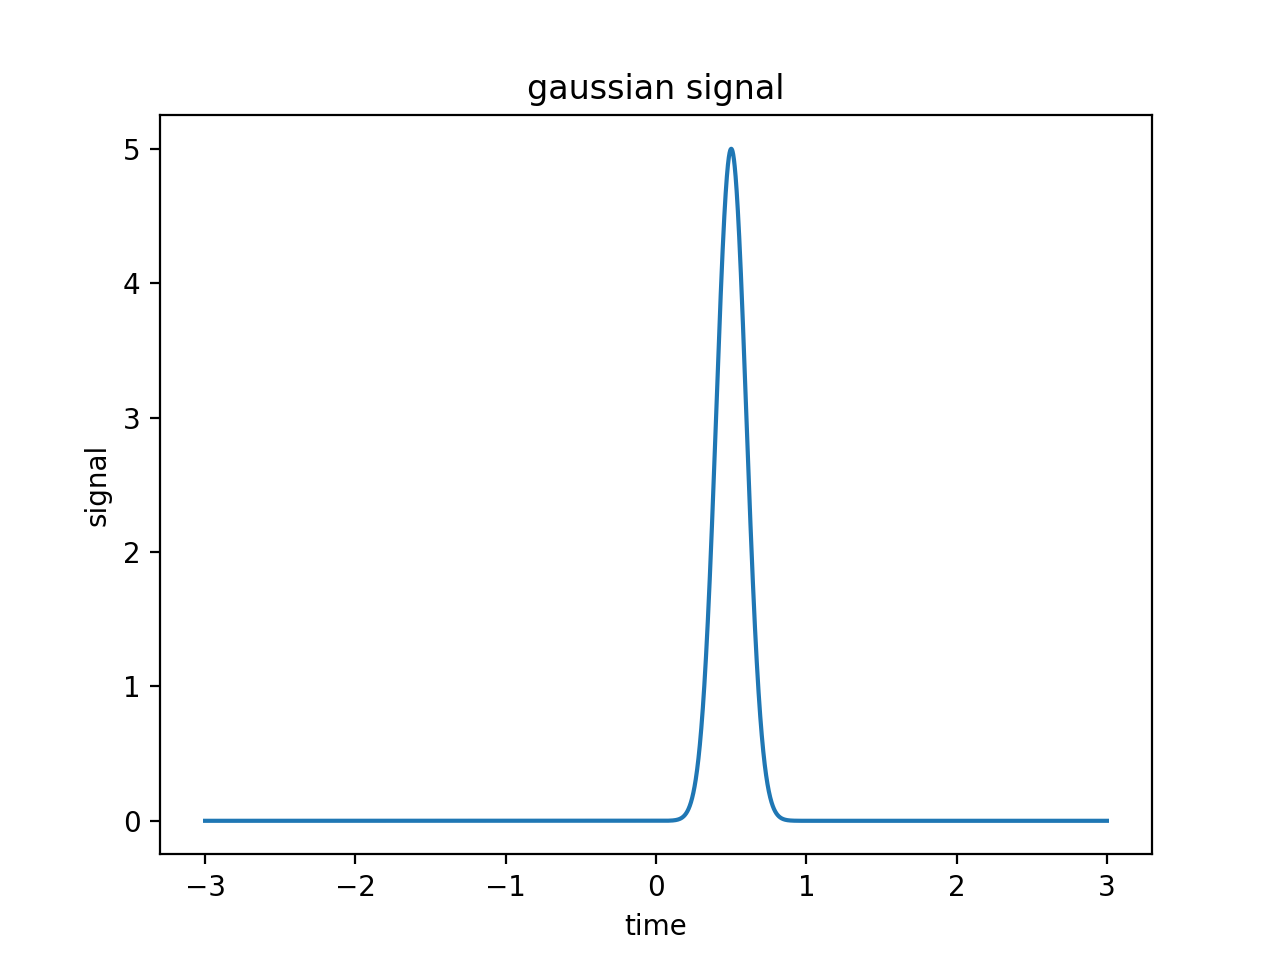

Text(0.5, 1.0, 'gaussian signal')

In [293]:
%matplotlib notebook
plt.plot(t_values, gaussian_data)
plt.xlabel("time")
plt.ylabel("signal")
plt.title("gaussian signal")

## Part 2a

In [36]:
# get the data from text file and convert to np array
file = open("./arecibo1.txt", 'r') 
data = np.array(file.readlines(), dtype=float)
print(data, len(data))

[-2.05081572  0.88440406  0.66505975 ... -2.48290914 -0.65188299
 -0.58959037] 32768


<IPython.core.display.Javascript object>


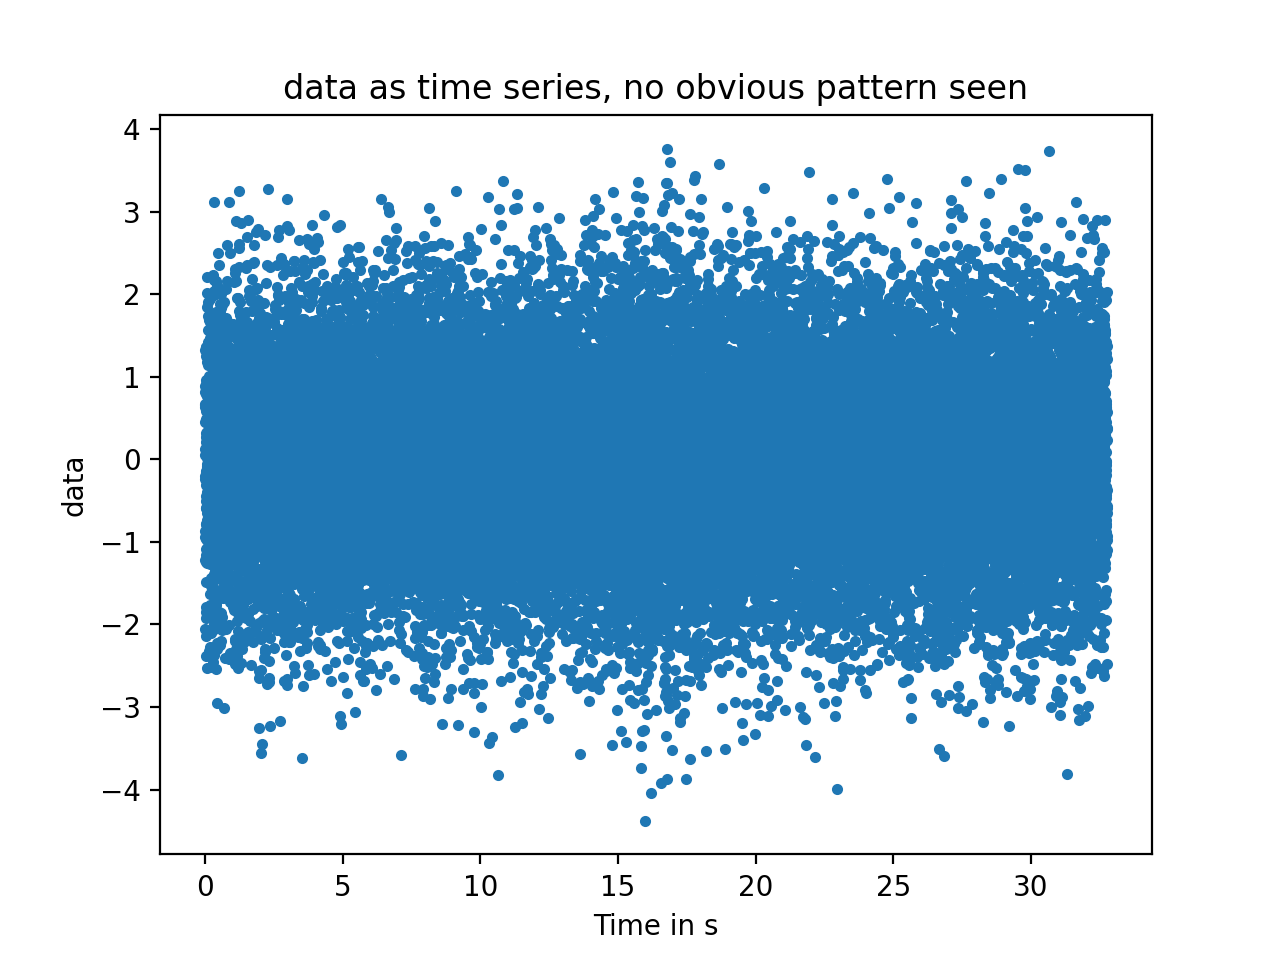

Text(0.5, 1.0, 'data as time series, no obvious pattern seen')

In [51]:
%matplotlib notebook
# makes plots interactive

samplingRate = 1000 # 1 millisecond <-> i kilohertz

times = np.arange(0, len(data)) / samplingRate

plt.plot(times, data, '.')
plt.xlabel("Time in s")
plt.ylabel("data")
plt.title("data as time series, no obvious pattern seen")

<IPython.core.display.Javascript object>


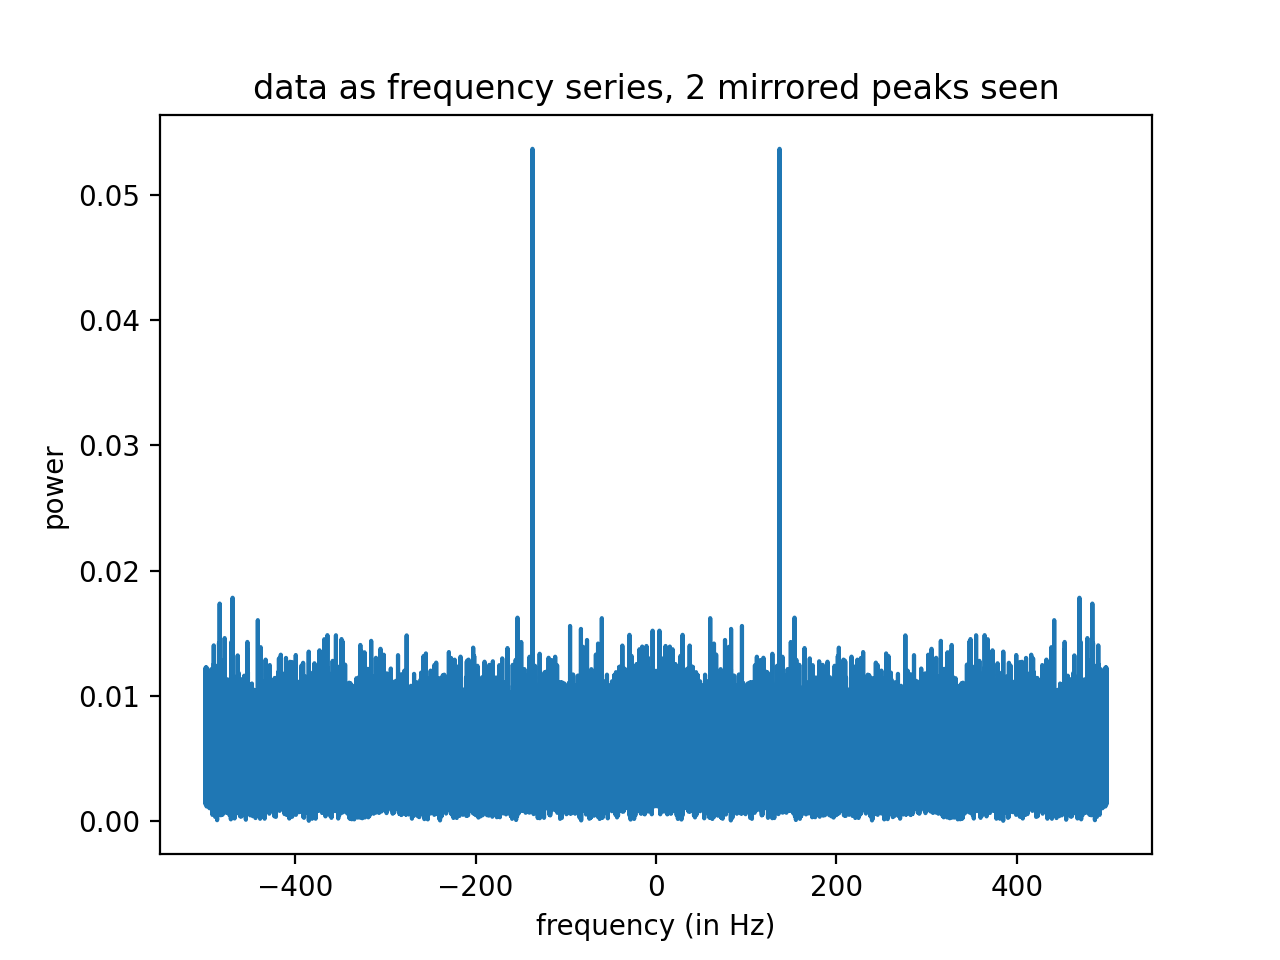

Text(0.5, 1.0, 'data as frequency series, 2 mirrored peaks seen')

In [137]:
%matplotlib notebook
# makes plots interactive

freq_data = fft.fft(data) / len(data)
freqs = fft.fftfreq(len(data), 1/samplingRate)

plt.plot(freqs, abs(freq_data))
plt.xlabel("frequency (in Hz)")
plt.ylabel("power")
plt.title("data as frequency series, 2 mirrored peaks seen")

In [138]:
# select the max power frequency
max_index = np.argmax(abs(freq_data))
max_freq = abs(freqs[max_index])
print(max_freq)

136.993408203125


<IPython.core.display.Javascript object>


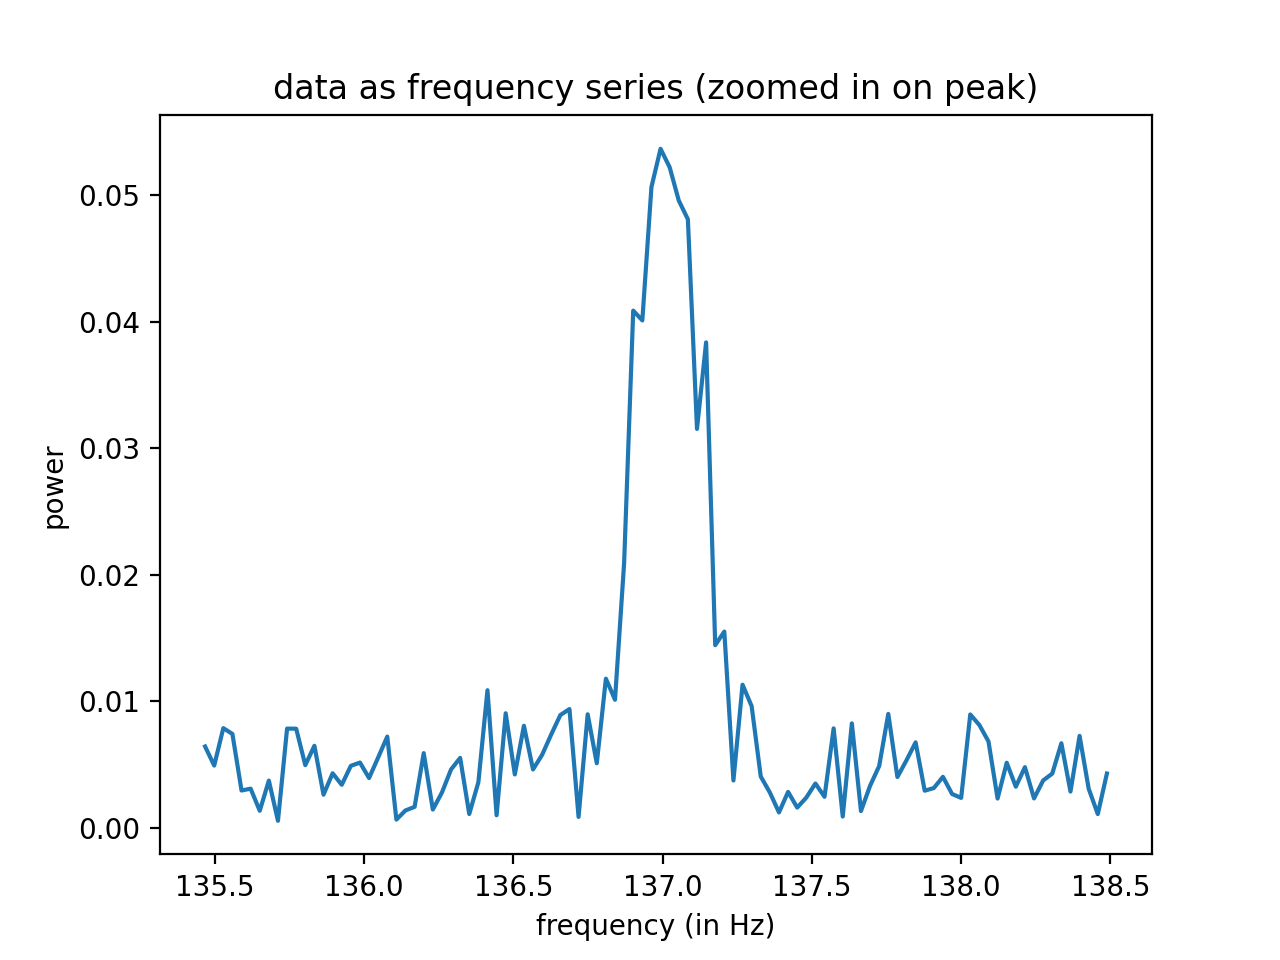

Text(0.5, 1.0, 'data as frequency series (zoomed in on peak)')

In [139]:
window_size = 50
plt.plot(freq[max_index-window_size: max_index+window_size], 
         abs(freq_data)[max_index-window_size: max_index+window_size])
plt.xlabel("frequency (in Hz)")
plt.ylabel("power")
plt.title("data as frequency series (zoomed in on peak)")

## Part 2b

In [140]:
def gaussian_sinusoidal(times, f, t0, dT):
    return np.sin(2 * np.pi * f * times) * np.exp(- ((times - t0) / dT) ** 2)

<IPython.core.display.Javascript object>


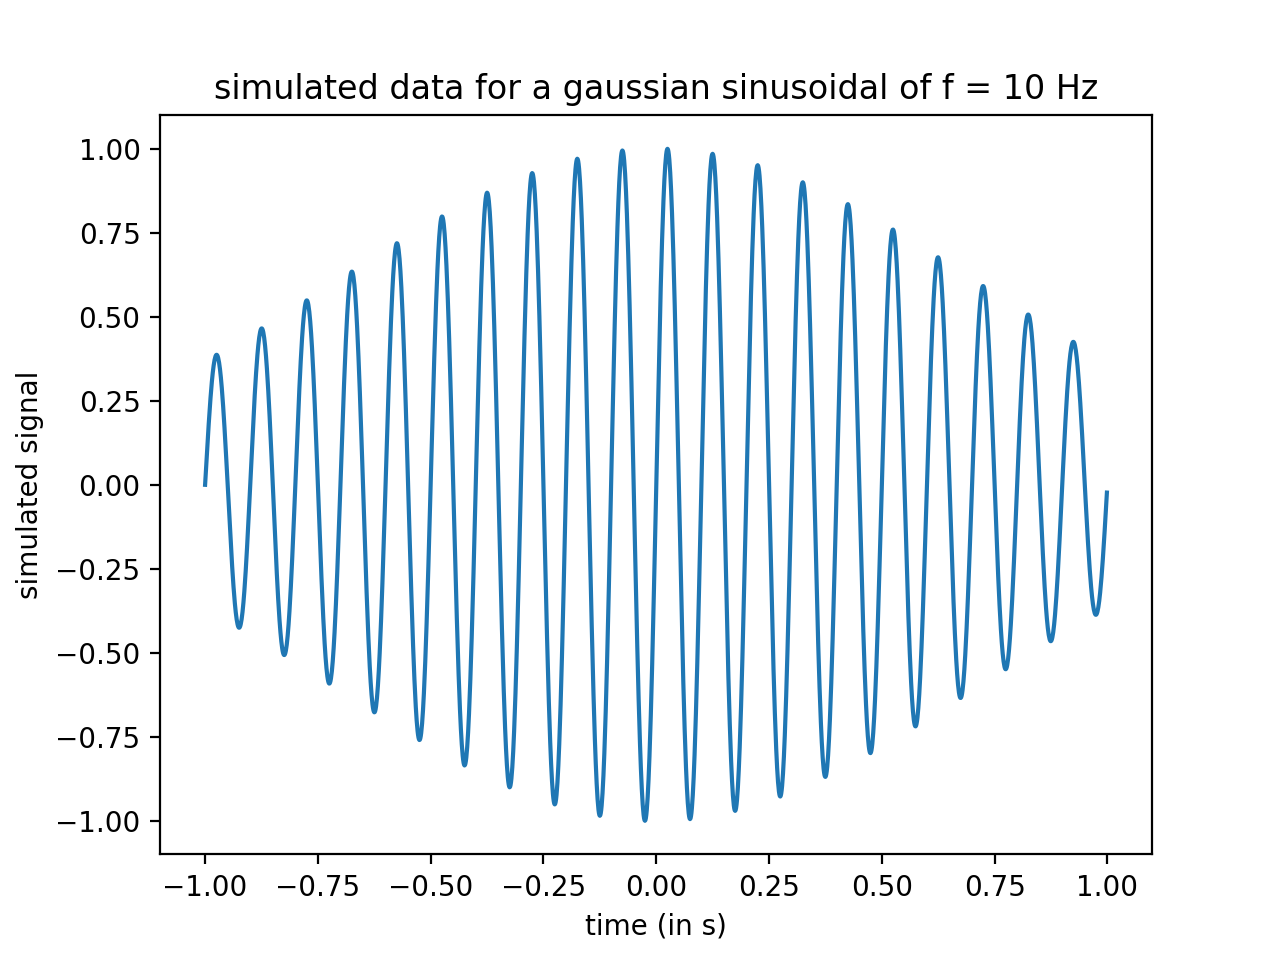

Text(0.5, 1.0, 'simulated data for a gaussian sinusoidal of f = 10 Hz')

In [141]:
%matplotlib notebook
g_times = np.arange(-1.0, 1.0, 1/samplingRate)
g_signal = gaussian_sinusoidal(g_times, 10, 0, 1)
plt.plot(g_times, g_signal)
plt.ylabel("simulated signal")
plt.xlabel("time (in s)")
plt.title("simulated data for a gaussian sinusoidal of f = 10 Hz")

<IPython.core.display.Javascript object>


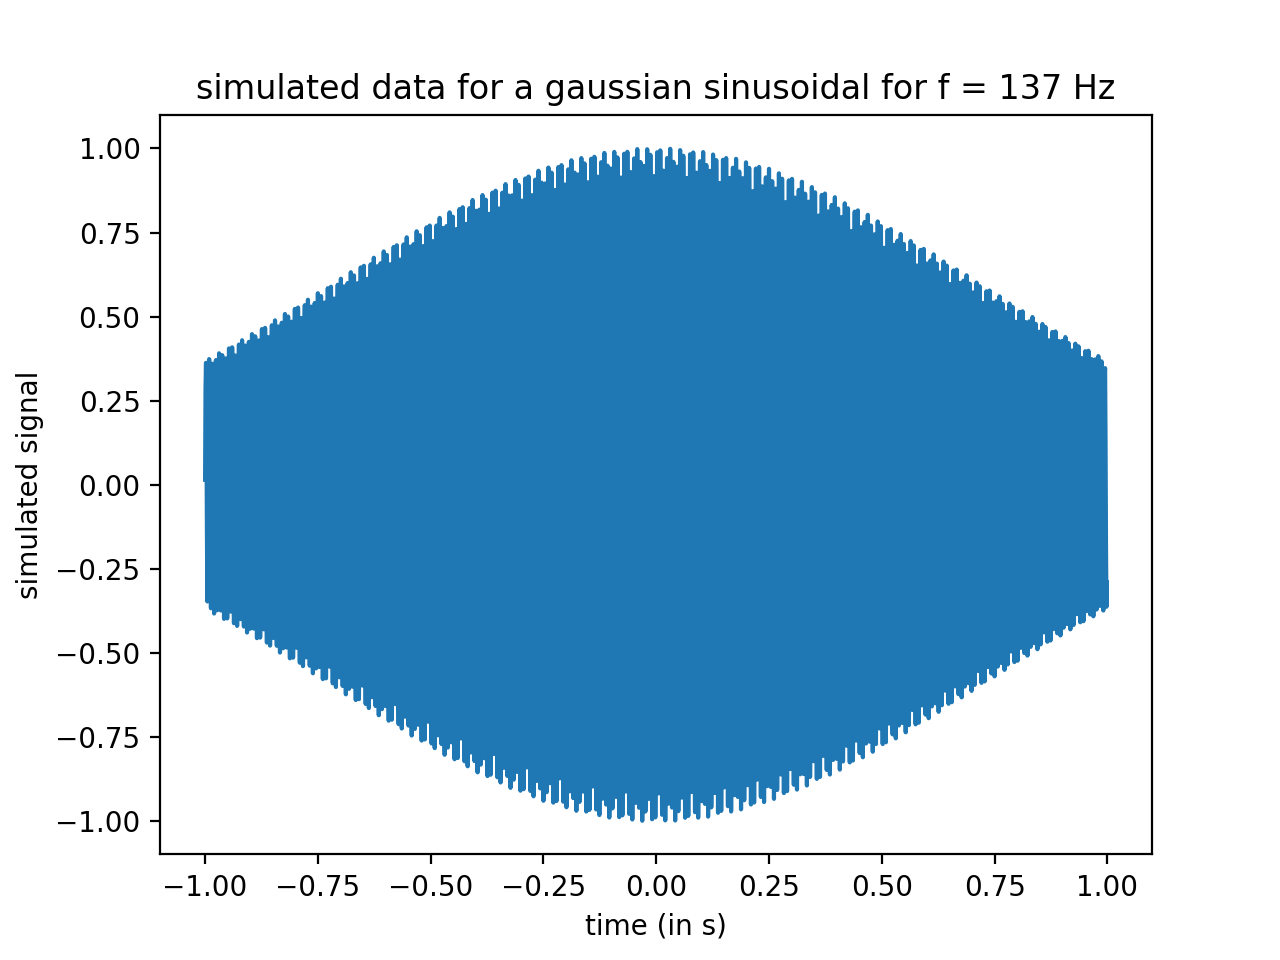

Text(0.5, 1.0, 'simulated data for a gaussian sinusoidal for f = 137 Hz')

In [159]:
%matplotlib notebook
g_signal = gaussian_sinusoidal(g_times, max_freq, 0, 1)

plt.plot(g_times, g_signal)
plt.ylabel("simulated signal")
plt.xlabel("time (in s)")
plt.title("simulated data for a gaussian sinusoidal for f = 137 Hz")

<IPython.core.display.Javascript object>


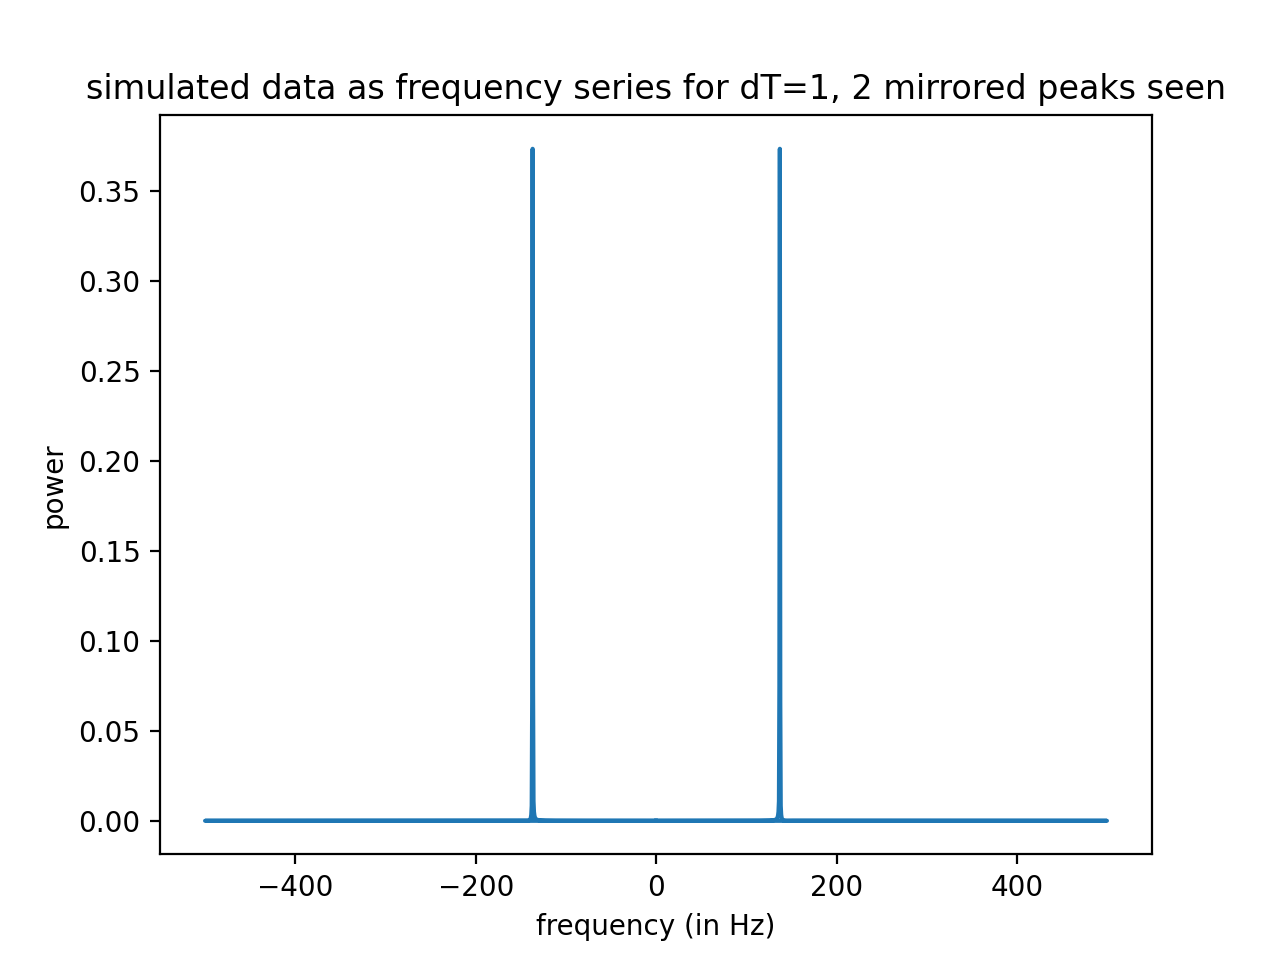

Text(0.5, 1.0, 'simulated data as frequency series for dT=1, 2 mirrored peaks seen')

In [165]:
%matplotlib notebook
# makes plots interactive

g_freq_data = fft.fft(g_signal) / len(g_signal)
g_freqs = fft.fftfreq(len(g_signal), 1/samplingRate)

plt.plot(g_freqs, abs(g_freq_data))
plt.xlabel("frequency (in Hz)")
plt.ylabel("power")
plt.title("simulated data as frequency series for dT=1, 2 mirrored peaks seen")

<IPython.core.display.Javascript object>


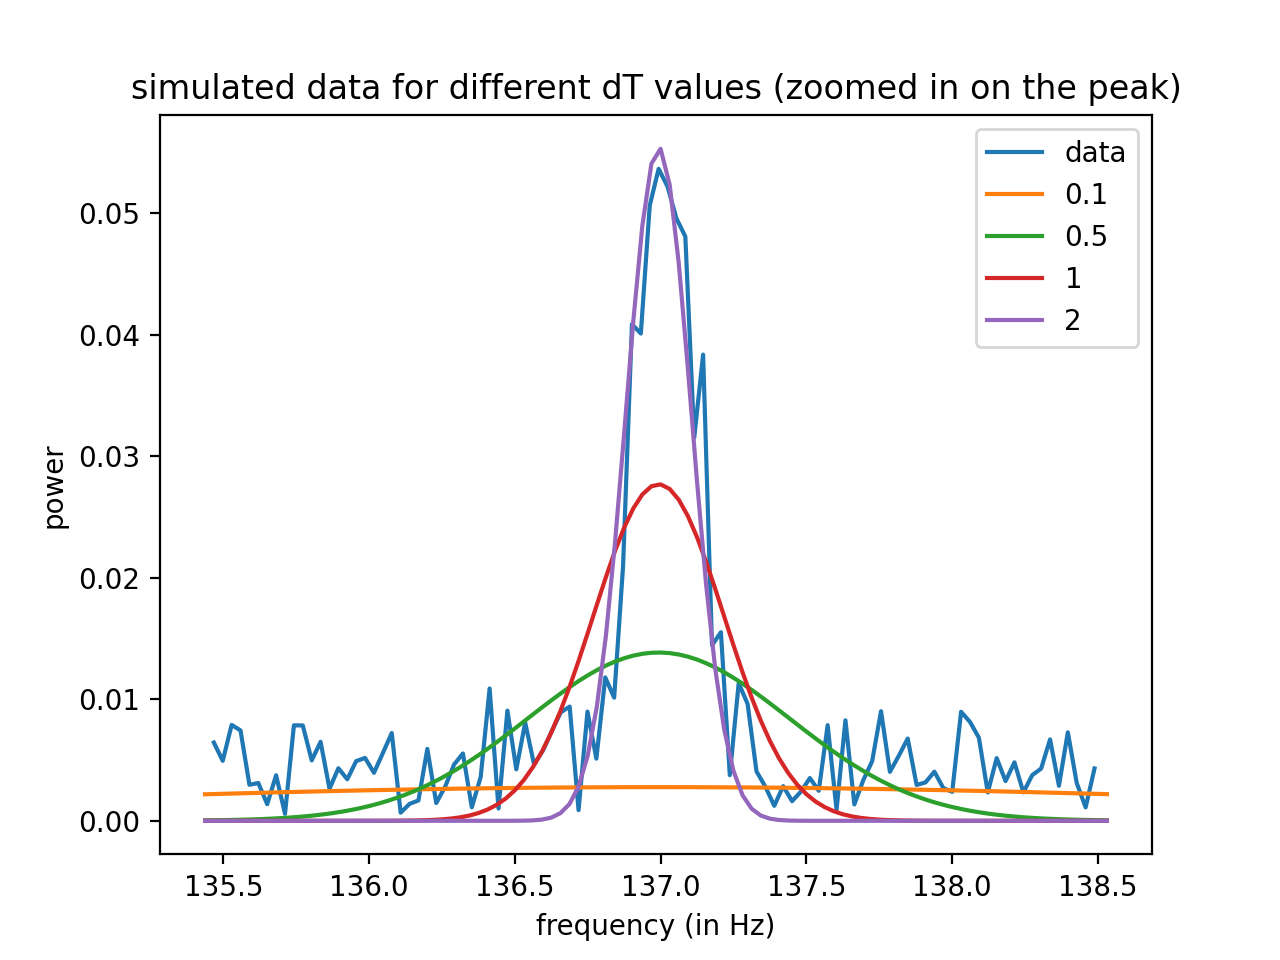

In [196]:
%matplotlib notebook
window_size = 50
plt.plot(freq[max_index-window_size: max_index+window_size], 
         abs(freq_data)[max_index-window_size: max_index+window_size], label = 'data')
plt.xlabel("frequency (in Hz)")
plt.ylabel("power")
plt.title("simulated data for different dT values (zoomed in on the peak)")

for dT in [0.1, 0.5, 1, 2]:
    g_times = np.arange(-16, 16, 1/samplingRate)
    g_signal = gaussian_sinusoidal(g_times, max_freq, 0, dT)
    
    g_freq_data = fft.fft(g_signal) / len(g_signal)
    g_freqs = fft.fftfreq(len(g_signal), 1/samplingRate)
    
    central_index = np.argmin(abs(g_freqs-max_freq))
    window_size = 50
    
    plt.plot(g_freqs[central_index-window_size: central_index+window_size], 
         abs(g_freq_data)[central_index-window_size: central_index+window_size], label = str(dT))
    
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


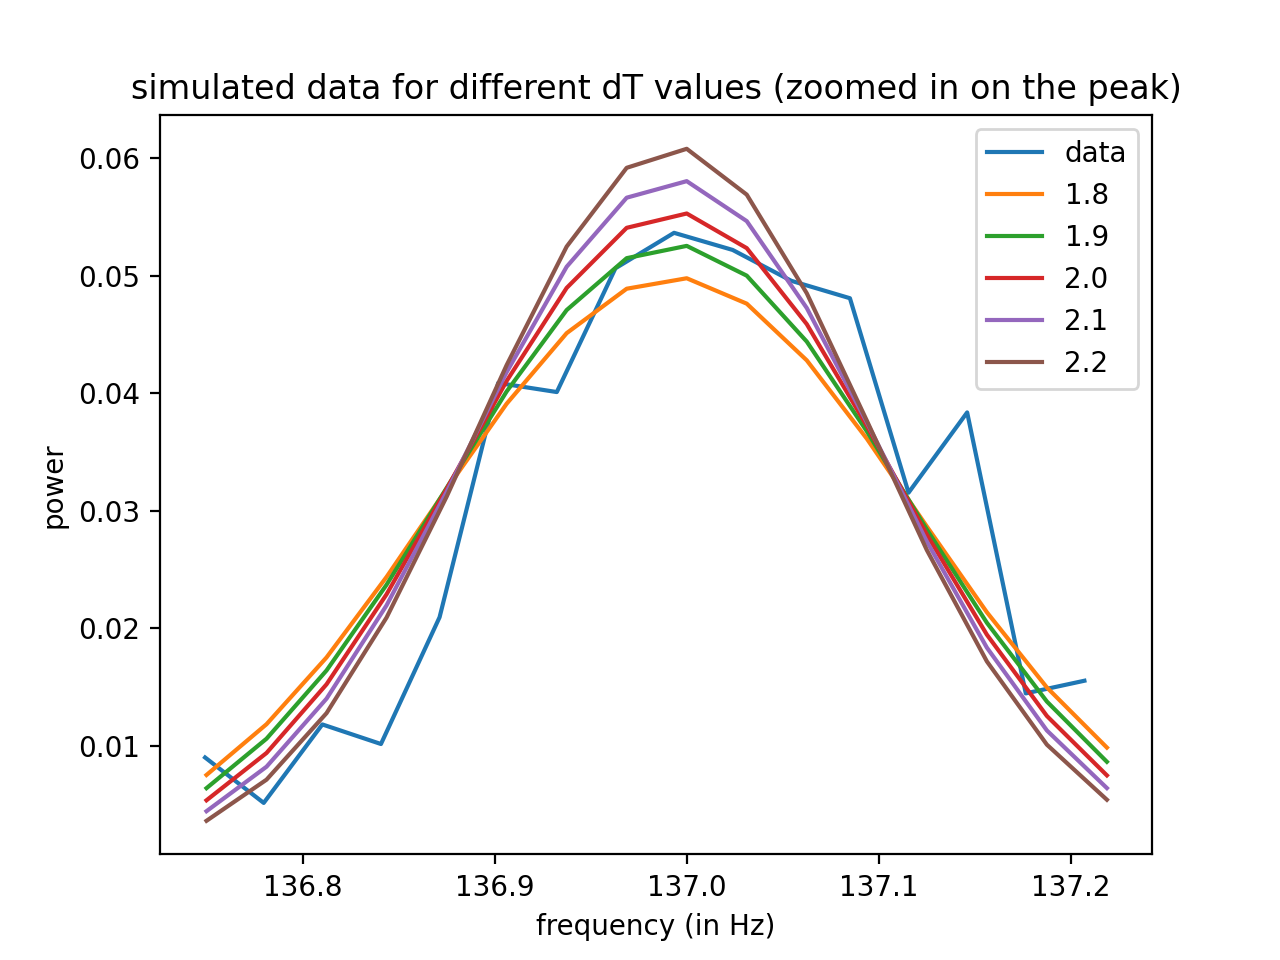

In [199]:
%matplotlib notebook
window_size = 8
plt.plot(freq[max_index-window_size: max_index+window_size], 
         abs(freq_data)[max_index-window_size: max_index+window_size], label = 'data')
plt.xlabel("frequency (in Hz)")
plt.ylabel("power")
plt.title("simulated data for different dT values (zoomed in on the peak)")

for dT in [1.8, 1.9, 2.0, 2.1, 2.2]:
    g_times = np.arange(-16, 16, 1/samplingRate)
    g_signal = gaussian_sinusoidal(g_times, max_freq, 0, dT)
    
    g_freq_data = fft.fft(g_signal) / len(g_signal)
#     g_freq_data = g_freq_data / np.max(abs(g_signal)) * np.max(abs(freq_data))
    g_freqs = fft.fftfreq(len(g_signal), 1/samplingRate)
    
    central_index = np.argmin(abs(g_freqs-max_freq))
    window_size = 8
    
    plt.plot(g_freqs[central_index-window_size: central_index+window_size], 
         abs(g_freq_data)[central_index-window_size: central_index+window_size], label = str(dT))
    
plt.legend()
plt.show()

## Part 3b